In [41]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv("Churn_Modelling.csv")

In [43]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
df.shape

(10000, 14)

In [45]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df.shape

(10000, 11)

In [47]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [48]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [49]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first=True, dtype='int64')
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int64  
 10  Geography_Spain    10000 non-null  int64  
 11  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [54]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [57]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 11), (8000,), (2000, 11), (2000,))

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

In [62]:
X_train_scaler

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [63]:
import tensorflow

In [64]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [72]:
model = Sequential()

model.add(Dense(10, activation='sigmoid', input_dim=11))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                120       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
history = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 5s 13ms/step - loss: 0.9116 - accuracy: 0.2042 - val_loss: 0.7278 - val_accuracy: 0.2031
Epoch 2/100
128/128 [==============================] - 1s 5ms/step - loss: 0.6366 - accuracy: 0.7069 - val_loss: 0.5694 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 1s 5ms/step - loss: 0.5416 - accuracy: 0.7958 - val_loss: 0.5198 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 1s 5ms/step - loss: 0.5139 - accuracy: 0.7958 - val_loss: 0.5069 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 1s 5ms/step - loss: 0.5074 - accuracy: 0.7958 - val_loss: 0.5039 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 1s 5ms/step - loss: 0.5057 - accuracy: 0.7958 - val_loss: 0.5031 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 1s 6ms/step - loss: 0.5052 - accuracy: 0.7958 - val_loss: 0.5025 - val_accuracy: 0.796

In [76]:
y_pred = model.predict(X_test)

63/63 [==============================] - 1s 3ms/step


In [77]:
y_pred

array([[0.1832967 ],
       [0.1832967 ],
       [0.23411526],
       ...,
       [0.23411526],
       [0.24850418],
       [0.1832967 ]], dtype=float32)

In [78]:
y_pred = y_pred.argmax(axis=-1)

In [79]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7975

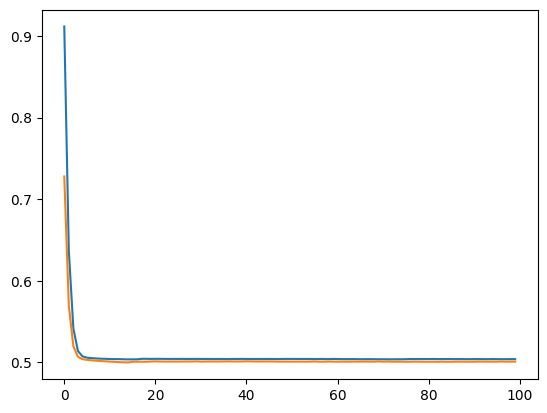

In [81]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

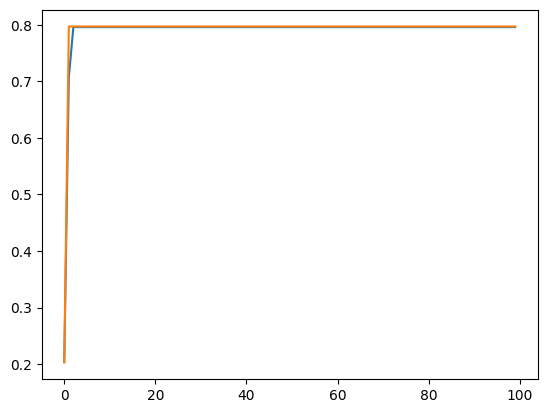

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [85]:
history.history

{'loss': [0.9116023778915405,
  0.6366309523582458,
  0.5415768027305603,
  0.5139252543449402,
  0.5073515772819519,
  0.5057477951049805,
  0.5051857829093933,
  0.504828929901123,
  0.5045316815376282,
  0.5043726563453674,
  0.5041553378105164,
  0.5040316581726074,
  0.5040021538734436,
  0.5037985444068909,
  0.5036646723747253,
  0.5037346482276917,
  0.5037555694580078,
  0.5043798089027405,
  0.5043725967407227,
  0.5042699575424194,
  0.5043481588363647,
  0.5043438076972961,
  0.5042880177497864,
  0.5042440891265869,
  0.5042860507965088,
  0.5042346119880676,
  0.5042805075645447,
  0.5042036771774292,
  0.504244327545166,
  0.5042694807052612,
  0.5042211413383484,
  0.5041999220848083,
  0.5042114853858948,
  0.5041239261627197,
  0.5041908025741577,
  0.504122793674469,
  0.5041021108627319,
  0.5042287707328796,
  0.5042014122009277,
  0.5042966604232788,
  0.5042161345481873,
  0.5041646957397461,
  0.504179060459137,
  0.5041502118110657,
  0.5041691064834595,
  0.50